# Anfis 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import sys
sys.path.insert(0, 'code/')
from anfis import ANFIS, predict
import membershipfunction

In [6]:
def doAnfis(X_train, X_test, Y_train, Y_test, epochs):
    # Define the membership functions for each feature
    mf = [
        [
            ['gaussmf', {'mean': 0, 'sigma': 0.2}],  # No exclamations
            ['gaussmf', {'mean': 0.65, 'sigma': 0.6}]  # Some exclamations (e.g., mean and beyond)
        ],
        [
            ['gaussmf', {'mean': 0, 'sigma': 0.15}],  # No questions
            ['gaussmf', {'mean': 1, 'sigma': 0.5}]    # Some questions (mean or slightly beyond)
        ],
        [
            ['gaussmf', {'mean': 0.5, 'sigma': 0.15}],  # Low objectivity
            ['gaussmf', {'mean': 0.75, 'sigma': 0.1}],  # Medium objectivity
            ['gaussmf', {'mean': 0.9, 'sigma': 0.1}]    # High objectivity
        ],
        [
            ['gaussmf', {'mean': 0, 'sigma': 0.1}],  # No joy
            ['gaussmf', {'mean': 0.3, 'sigma': 0.2}]  # Some joy
        ],
        [
            ['gaussmf', {'mean': 0, 'sigma': 0.1}],  # Neutral/No negativity
            ['gaussmf', {'mean': 0.5, 'sigma': 0.2}],  # Some negativity
            ['gaussmf', {'mean': 1, 'sigma': 0.1}]     # Strong negativity
        ],
        [
            ['gaussmf', {'mean': 0, 'sigma': 0.1}],  # Neutral/No positivity
            ['gaussmf', {'mean': 0.5, 'sigma': 0.2}],  # Some positivity
            ['gaussmf', {'mean': 1, 'sigma': 0.1}]     # Strong positivity
        ]
    ]
    
    # Initialize Membership functions and ANFIS
    mfc = membershipfunction.MemFuncs(mf)
    anf = ANFIS(X_train, Y_train, mfc)
    
    # Train the ANFIS model
    anf.trainHybridJangOffLine(epochs=epochs)
    
    # Make predictions on the test set
    predictions = predict(anf, X_test)
    
    # Post-process predictions to match Y_train/Y_test dimensions
    # Rounding predictions to the nearest integer as the output should be categorical
    predictions_rounded = np.rint(predictions).astype(int).flatten()
    
    # Accuracy calculation
    accuracy = accuracy_score(Y_test, predictions_rounded)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Optionally, plot errors and results
    anf.plotErrors()
    anf.plotResults()
    
    return anf

Data loaded


Processing:   0%|          | 0/100 [00:00<?, ?it/s]

current error: 2708.996469066938


Processing:   1%|          | 1/100 [04:42<7:46:26, 282.69s/it]

current error: 2687.980977459974


Processing:   2%|▏         | 2/100 [09:29<7:45:27, 284.98s/it]

current error: 2693.9780846194003


Processing:   3%|▎         | 3/100 [14:11<7:39:01, 283.94s/it]

current error: 2701.4453814332446


Processing:   4%|▍         | 4/100 [18:55<7:33:52, 283.67s/it]

current error: 2711.192356920275


Processing:   5%|▌         | 5/100 [23:30<7:24:32, 280.77s/it]

current error: 2724.497382067581


Processing:   6%|▌         | 6/100 [28:10<7:19:09, 280.31s/it]

current error: 2743.6681241223523


Processing:   7%|▋         | 7/100 [32:47<7:13:08, 279.45s/it]

current error: 2745.2845809182318


Processing:   8%|▊         | 8/100 [37:24<7:07:14, 278.64s/it]

current error: 2743.2930746118354


Processing:   9%|▉         | 9/100 [42:02<7:02:06, 278.31s/it]

current error: 2741.3000813264125


Processing:  10%|█         | 10/100 [46:41<6:57:39, 278.44s/it]

current error: 2739.285930684785


Processing:  11%|█         | 11/100 [51:18<6:52:24, 278.03s/it]

current error: 2737.0066445799457


Processing:  12%|█▏        | 12/100 [55:51<6:45:49, 276.70s/it]

current error: 2734.349981416868


Processing:  13%|█▎        | 13/100 [1:00:37<6:45:17, 279.51s/it]

current error: 2731.129609147484


Processing:  14%|█▍        | 14/100 [1:05:32<6:47:05, 284.02s/it]

current error: 2727.050998951474


Processing:  15%|█▌        | 15/100 [1:10:45<6:54:55, 292.89s/it]

current error: 2721.686679288786


Processing:  16%|█▌        | 16/100 [1:16:22<7:08:26, 306.03s/it]

current error: 2714.497985444448


Processing:  17%|█▋        | 17/100 [1:21:17<6:58:43, 302.70s/it]

current error: 2704.9381859241294


Processing:  18%|█▊        | 18/100 [1:26:08<6:49:09, 299.38s/it]

current error: 2692.7019347730197


Processing:  19%|█▉        | 19/100 [1:31:08<6:44:24, 299.56s/it]

current error: 2678.5927751649087


Processing:  20%|██        | 20/100 [1:37:40<7:16:19, 327.24s/it]

current error: 2664.3395413785943


Processing:  21%|██        | 21/100 [1:43:54<7:29:04, 341.08s/it]

current error: 2655.3421885596354


Processing:  22%|██▏       | 22/100 [1:49:58<7:32:35, 348.14s/it]

current error: 2684.178360348643


Processing:  23%|██▎       | 23/100 [1:56:18<7:39:06, 357.75s/it]

current error: 2724.484498900917


Processing:  24%|██▍       | 24/100 [2:02:38<7:41:22, 364.24s/it]

current error: 2737.829638201447


Processing:  25%|██▌       | 25/100 [2:08:44<7:36:13, 364.98s/it]

current error: 2742.7173704781344


Processing:  26%|██▌       | 26/100 [2:15:23<7:42:40, 375.15s/it]

current error: 2742.907452802047


Processing:  27%|██▋       | 27/100 [2:26:06<9:14:13, 455.53s/it]

current error: 2739.227768771377


Processing:  28%|██▊       | 28/100 [2:40:15<11:28:10, 573.48s/it]

current error: 2732.158533695142


Processing:  29%|██▉       | 29/100 [2:45:56<9:56:01, 503.69s/it] 

current error: 2722.4923588483584


Processing:  30%|███       | 30/100 [2:50:37<8:29:44, 436.93s/it]

current error: 2712.5416915944625


Processing:  31%|███       | 31/100 [2:55:16<7:27:58, 389.54s/it]

current error: 2712.3338265132215


Processing:  32%|███▏      | 32/100 [2:59:57<6:44:26, 356.87s/it]

current error: 2796.3772705046276


Processing:  33%|███▎      | 33/100 [3:04:44<6:15:07, 335.94s/it]

current error: 2818.9381078197357


Processing:  34%|███▍      | 34/100 [3:09:21<5:50:11, 318.36s/it]

current error: 2785.4046756379817


Processing:  35%|███▌      | 35/100 [3:13:59<5:31:42, 306.19s/it]

current error: 2741.318985297153


Processing:  36%|███▌      | 36/100 [3:18:35<5:17:02, 297.23s/it]

current error: 2733.486287093844


Processing:  37%|███▋      | 37/100 [3:23:12<5:05:42, 291.14s/it]

current error: 2742.751949365404


Processing:  38%|███▊      | 38/100 [3:27:49<4:56:22, 286.82s/it]

current error: 2762.531770298462


Processing:  39%|███▉      | 39/100 [3:32:24<4:48:05, 283.37s/it]

current error: 2781.513874133661


Processing:  40%|████      | 40/100 [3:37:03<4:42:02, 282.05s/it]

current error: 2798.534059608554


Processing:  41%|████      | 41/100 [3:41:48<4:38:08, 282.86s/it]

current error: 2813.9974504892


Processing:  42%|████▏     | 42/100 [3:47:05<4:43:19, 293.10s/it]

current error: 2803.592256435402


Processing:  43%|████▎     | 43/100 [3:52:23<4:45:28, 300.49s/it]

current error: 2811.1724518019564


Processing:  44%|████▍     | 44/100 [3:57:39<4:44:46, 305.12s/it]

current error: 2799.0699326863178


Processing:  45%|████▌     | 45/100 [4:02:59<4:43:46, 309.58s/it]

current error: 2809.227521467582


Processing:  46%|████▌     | 46/100 [4:08:20<4:41:48, 313.12s/it]

current error: 2826.5844178840453


Processing:  47%|████▋     | 47/100 [4:13:46<4:40:07, 317.12s/it]

current error: 2848.505412427339


Processing:  48%|████▊     | 48/100 [4:19:06<4:35:23, 317.77s/it]

current error: 2870.3088633301095


Processing:  49%|████▉     | 49/100 [4:24:03<4:24:53, 311.63s/it]

current error: 2886.4699089934597


Processing:  50%|█████     | 50/100 [4:28:59<4:15:50, 307.02s/it]

current error: 2869.838289866313


Processing:  51%|█████     | 51/100 [4:33:56<4:08:13, 303.95s/it]

current error: 2866.0902375002556


Processing:  52%|█████▏    | 52/100 [4:38:56<4:02:11, 302.74s/it]

current error: 2854.510176497187


Processing:  53%|█████▎    | 53/100 [4:43:58<3:56:55, 302.45s/it]

current error: 2853.211972607241


Processing:  54%|█████▍    | 54/100 [4:48:34<3:45:49, 294.55s/it]

current error: 2854.684564805743


Processing:  55%|█████▌    | 55/100 [4:53:13<3:37:31, 290.03s/it]

current error: 2919.795020650916


Processing:  56%|█████▌    | 56/100 [4:57:50<3:29:50, 286.15s/it]

current error: 2916.5700972191653


Processing:  57%|█████▋    | 57/100 [5:02:28<3:23:15, 283.61s/it]

current error: 2912.527258288187


Processing:  58%|█████▊    | 58/100 [5:07:00<3:16:00, 280.01s/it]

current error: 2909.1039079453217


Processing:  59%|█████▉    | 59/100 [5:11:36<3:10:39, 279.00s/it]

current error: 2914.047774467605


Processing:  60%|██████    | 60/100 [5:16:15<3:06:00, 279.02s/it]

current error: 2920.371895209073


Processing:  61%|██████    | 61/100 [5:20:52<3:00:50, 278.22s/it]

current error: 3064.1831115483687


Processing:  62%|██████▏   | 62/100 [5:25:29<2:56:00, 277.91s/it]

current error: 3081.2921013084465


Processing:  63%|██████▎   | 63/100 [5:30:05<2:51:01, 277.34s/it]

current error: 3075.941777446259


Processing:  64%|██████▍   | 64/100 [5:34:52<2:48:04, 280.12s/it]

current error: 3078.4885193840846


Processing:  65%|██████▌   | 65/100 [5:39:45<2:45:39, 283.99s/it]

current error: 3081.2677331346804


Processing:  66%|██████▌   | 66/100 [5:44:26<2:40:28, 283.18s/it]

current error: 3084.6508485478903


Processing:  67%|██████▋   | 67/100 [5:49:04<2:34:50, 281.54s/it]

current error: 3092.4107312252554


Processing:  68%|██████▊   | 68/100 [5:53:45<2:30:05, 281.42s/it]

current error: 3104.8935289515002


Processing:  69%|██████▉   | 69/100 [5:58:16<2:23:54, 278.53s/it]

current error: 3127.1669268268197


Processing:  70%|███████   | 70/100 [6:02:55<2:19:12, 278.42s/it]

current error: 3126.4735132272917


Processing:  71%|███████   | 71/100 [6:07:32<2:14:28, 278.23s/it]

current error: 3125.23356955618


Processing:  72%|███████▏  | 72/100 [6:12:08<2:09:24, 277.30s/it]

current error: 3123.468565716704


Processing:  73%|███████▎  | 73/100 [6:16:41<2:04:18, 276.26s/it]

current error: 3120.9792739382265


Processing:  74%|███████▍  | 74/100 [6:21:18<1:59:47, 276.45s/it]

current error: 3117.6021651778897


Processing:  75%|███████▌  | 75/100 [6:26:02<1:56:02, 278.49s/it]

current error: 3113.1075268486493


Processing:  76%|███████▌  | 76/100 [6:30:38<1:51:11, 277.98s/it]

current error: 3107.485867834579


Processing:  77%|███████▋  | 77/100 [6:35:16<1:46:33, 277.96s/it]

current error: 3102.2620229585173


Processing:  78%|███████▊  | 78/100 [6:39:58<1:42:18, 279.02s/it]

current error: 3105.4985775570917


Processing:  79%|███████▉  | 79/100 [6:44:37<1:37:41, 279.10s/it]

current error: 3135.852466286662


Processing:  80%|████████  | 80/100 [6:49:15<1:32:57, 278.90s/it]

current error: 3160.3206460297524


Processing:  81%|████████  | 81/100 [6:53:58<1:28:38, 279.94s/it]

current error: 3160.0245454932046


Processing:  82%|████████▏ | 82/100 [6:58:37<1:23:55, 279.77s/it]

current error: 3164.169902563064


Processing:  83%|████████▎ | 83/100 [7:03:16<1:19:09, 279.36s/it]

current error: 3153.6866749663973


Processing:  84%|████████▍ | 84/100 [7:07:55<1:14:28, 279.28s/it]

current error: 3156.19784618182


Processing:  85%|████████▌ | 85/100 [7:12:39<1:10:09, 280.65s/it]

current error: 3158.2997763062417


Processing:  86%|████████▌ | 86/100 [7:17:17<1:05:18, 279.89s/it]

current error: 3160.477866078025


Processing:  87%|████████▋ | 87/100 [7:22:11<1:01:35, 284.28s/it]

current error: 3162.6066693990574


Processing:  88%|████████▊ | 88/100 [7:26:47<56:19, 281.62s/it]  

current error: 3164.4854580844312


Processing:  89%|████████▉ | 89/100 [7:31:24<51:24, 280.42s/it]

current error: 3166.0309641678004


Processing:  90%|█████████ | 90/100 [7:36:07<46:52, 281.21s/it]

current error: 3167.272606666013


Processing:  91%|█████████ | 91/100 [7:40:48<42:10, 281.12s/it]

current error: 3168.2907989045752


Processing:  92%|█████████▏| 92/100 [7:45:26<37:20, 280.02s/it]

current error: 3169.167128339185


Processing:  93%|█████████▎| 93/100 [7:50:05<32:38, 279.79s/it]

current error: 3169.972275906781


Processing:  94%|█████████▍| 94/100 [7:54:43<27:55, 279.26s/it]

current error: 3170.8241964681133


Processing:  95%|█████████▌| 95/100 [7:59:23<23:17, 279.52s/it]

current error: 3176.9686972667596


Processing:  96%|█████████▌| 96/100 [8:04:02<18:37, 279.43s/it]

current error: 3177.822940825102


Processing:  97%|█████████▋| 97/100 [8:08:42<13:58, 279.49s/it]

current error: 3175.846020805511


Processing:  98%|█████████▊| 98/100 [8:13:48<09:34, 287.48s/it]

current error: 3176.7574310889795


Processing:  99%|█████████▉| 99/100 [8:19:05<05:02, 302.48s/it]


Accuracy: 12.61%


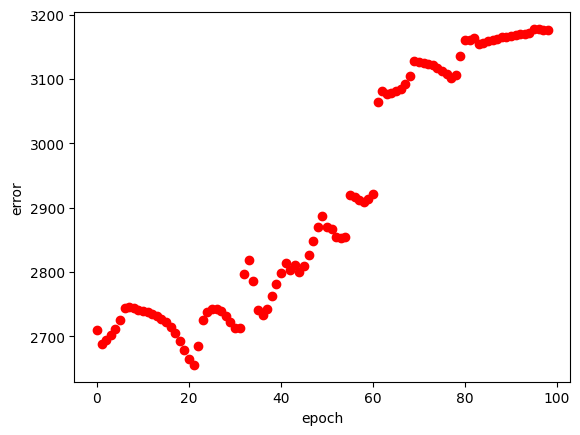

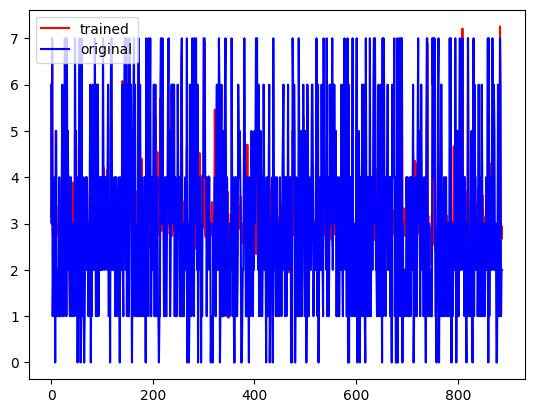

In [4]:
processed_data = pd.read_csv('anfis_input.csv')
print("Data loaded")

# Features to keep for the fuzzy system
to_keep = ['exclamation_score', 'question_score', 'obj_score', 'joy_score', 'vader_neg', 'vader_pos']

# Subset the dataframe for input features
fuzzy_data = processed_data[to_keep]

# Mapping the target variable (Emotion) to numeric values
mapping_dict = {value: index for index, value in enumerate(processed_data['Emotion'].unique())}
processed_data['Emotion_mapped'] = processed_data['Emotion'].map(mapping_dict)

# Input (X) and Target (Y) variables
X = fuzzy_data.values
Y = processed_data['Emotion_mapped'].values

# Split the data into training and testing sets using train_test_split with stratification
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Train and evaluate ANFIS
anfis_model = doAnfis(X_train, X_test, Y_train, Y_test, 100)

Processing:   0%|          | 0/22 [00:00<?, ?it/s]

current error: 2708.996469066938


Processing:   5%|▍         | 1/22 [05:21<1:52:31, 321.50s/it]

current error: 2687.980977459974


Processing:   9%|▉         | 2/22 [11:08<1:52:14, 336.72s/it]

current error: 2693.9780846194003


Processing:  14%|█▎        | 3/22 [16:25<1:43:44, 327.60s/it]

current error: 2701.4453814332446


Processing:  18%|█▊        | 4/22 [21:52<1:38:12, 327.35s/it]

current error: 2711.192356920275


Processing:  23%|██▎       | 5/22 [27:06<1:31:25, 322.67s/it]

current error: 2724.497382067581


Processing:  27%|██▋       | 6/22 [32:19<1:25:08, 319.27s/it]

current error: 2743.6681241223523


Processing:  32%|███▏      | 7/22 [38:13<1:22:39, 330.65s/it]

current error: 2745.2845809182318


Processing:  36%|███▋      | 8/22 [43:27<1:15:54, 325.33s/it]

current error: 2743.2930746118354


Processing:  41%|████      | 9/22 [48:13<1:07:47, 312.92s/it]

current error: 2741.3000813264125


Processing:  45%|████▌     | 10/22 [54:44<1:07:26, 337.23s/it]

current error: 2739.285930684785


Processing:  50%|█████     | 11/22 [1:02:28<1:08:54, 375.86s/it]

current error: 2737.0066445799457


Processing:  55%|█████▍    | 12/22 [1:10:05<1:06:45, 400.52s/it]

current error: 2734.349981416868


Processing:  59%|█████▉    | 13/22 [1:17:40<1:02:34, 417.12s/it]

current error: 2731.129609147484


Processing:  64%|██████▎   | 14/22 [1:25:18<57:15, 429.38s/it]  

current error: 2727.050998951474


Processing:  68%|██████▊   | 15/22 [1:32:52<50:57, 436.81s/it]

current error: 2721.686679288786


Processing:  73%|███████▎  | 16/22 [1:40:27<44:14, 442.45s/it]

current error: 2714.497985444448


Processing:  77%|███████▋  | 17/22 [1:48:02<37:10, 446.09s/it]

current error: 2704.9381859241294


Processing:  82%|████████▏ | 18/22 [1:55:24<29:39, 444.97s/it]

current error: 2692.7019347730197


Processing:  86%|████████▋ | 19/22 [2:00:35<20:13, 404.54s/it]

current error: 2678.5927751649087


Processing:  91%|█████████ | 20/22 [2:05:08<12:10, 365.27s/it]

current error: 2664.3395413785943


Processing:  95%|█████████▌| 21/22 [2:09:43<06:10, 370.62s/it]


Accuracy: 15.77%


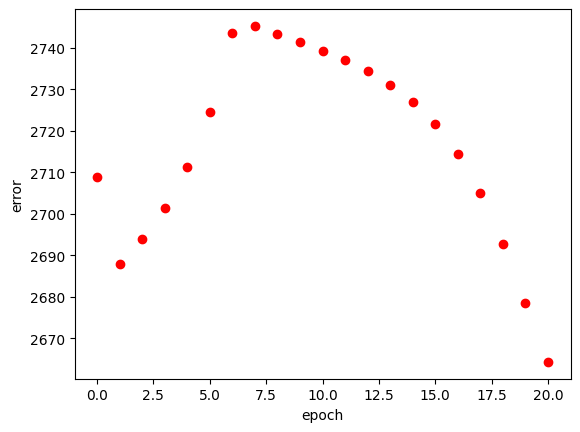

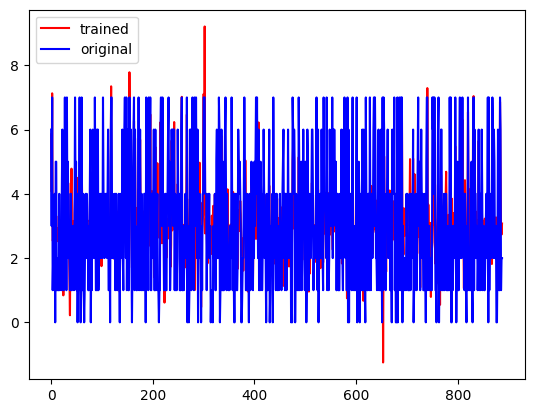

In [7]:
anfis_model_2 = doAnfis(X_train, X_test, Y_train, Y_test, 22)

Based on the summary statistics we created for each of the six features, we can tailor the membership functions (MFs) for the fuzzy system. The goal is to capture the distribution of each feature effectively by setting appropriate mean and sigma values for Gaussian membership functions.


	    exclamation_score	question_score	obj_score	joy_score	vader_neg	vader_pos
count	1110.000000	        1110.000000	    1110.000000	1110.000000	1110.000000	1110.000000
mean	0.065042	        0.042836	    0.764637	0.044619	0.086072	0.123200
std	    0.231353	        0.184856	    0.146033	0.085424	0.119278	0.137306
min	    0.000000	        0.000000	    0.000000	0.000000	0.000000	0.000000
25%	    0.000000	        0.000000	    0.680783	0.000000	0.000000	0.000000
50%	    0.000000	        0.000000	    0.775212	0.000000	0.046000	0.099000
75%	    0.000000	        0.013289	    0.861111	0.064516	0.131000	0.177750
max	    3.000000	        4.000000	    1.000000	1.000000	1.000000	1.000000


General Approach:
Mean (mean): Set based on typical values such as quartiles or based on the distribution's central tendency (e.g., mean or median).
Sigma (sigma): Set based on the spread of the data, using standard deviation or a fraction of the feature range.


1. exclamation_score
Range: [0, 3] with most data around 0 (75% of the data has a value of 0).
Mean: You might consider separating between "no exclamations" and "has exclamations". Set one MF around 0 for the bulk of the data and another around the mean or a higher value for rare instances of multiple exclamations.
Sigma: Based on the standard deviation (0.23), choose a moderate width for the Gaussians.

2. question_score
Range: [0, 4], with most data around 0 (median and 75% are 0).
Mean: Similar to exclamation_score, most data is 0. So, you can have one MF around 0 and another around the mean or a larger value.
Sigma: The standard deviation is 0.18, so the spread should reflect this.

3. obj_score
Range: [0, 1], with mean 0.76, most data between 0.68 and 0.86.
Mean: Since this feature seems to be concentrated in the higher range (close to 1), you could have MFs representing low, medium, and high scores.
Sigma: With a standard deviation of 0.15, MFs should have moderate overlap.

4. joy_score
Range: [0, 1], with most data clustered around 0 (50% of the data is 0, mean is 0.044).
Mean: You can have one MF for "no joy" around 0 and another for "presence of joy" closer to 1.
Sigma: Standard deviation is 0.085, so use small spread.

5. vader_neg (Negative sentiment)
Range: [0, 1], with most data concentrated at 0, but there's a small tail up to 1.
Mean: Have one MF around 0 for neutral sentiment, and another for stronger negative sentiment around 1.
Sigma: Standard deviation is 0.12, so a relatively narrow spread can be used.

6. vader_pos (Positive sentiment)
Range: [0, 1], mean is 0.12, with most data below 0.18.
Mean: Have one MF for neutral sentiment around 0, and another for positive sentiment closer to 1.
Sigma: Similar to vader_neg, standard deviation is 0.14, so a narrow spread can be used.

Explanation:
exclamation_score and question_score: Since most values are 0, we use two MFs to separate "no exclamation/question" from "some exclamations/questions".
obj_score: A higher range, and since values cluster around 0.76, we have three MFs representing low, medium, and high objectivity.
joy_score, vader_neg, and vader_pos: These use two or three MFs to represent "none", "some", and "strong" joy/negativity/positivity.
This setup gives a good balance between capturing the typical range and outliers in your dataset.